# Finding the 2D $Y$-$E_r$ Distributions Given Arvind's Yield Dist

Arvind has calculated 1-dimensional yield distributions for a given recoil energy, $E_r$. For some of the analysis of the NR Fano paper we would like to know the 2-dimensional distribution in the Yield-Recoil plane. I try to begin calculating that below, first for the $E_p$/$E_q$ plane. 

## The $Y$/$E_r$ Plane

Here, I'm jumping into the $Y$-$E_r$ plane instead.

In [1]:
import numpy as np

#construct the functions

#constants
V = 4.0
eps = 3.3/1000 #in keV/pair
sigq = 1.0
sigp = 1.0
F = 1.0

#yield
a = 0.00751668
b = 0.40236176

#y = lambda x: a*x**b
y = lambda x: 1



In [2]:
#get Arvind's function
from prob_dist import ratio_dist_v2

#remember the signature: def ratio_dist_v2(x, Er, meanN, sdP, sdQ, sdN, V,e)

far = lambda Y,Er: ratio_dist_v2(Y,Er,Er*y(Er)/eps,sigp,sigq,np.sqrt(F*Er*y(Er)/eps),V/1000,eps)

print(far(0.7,10))

0.7850222196718387


In [3]:
#get the distribution in Er, use a simple exponential for now

alpha = 1/100 #that means will be down by a factor of e at 100 keV

per = lambda Er: alpha*np.exp(-alpha*Er)

In [4]:
pj = lambda Er,Y: far(Y,Er)*per(Er)

print(pj(10,0.7))

0.007103174783487243


In [5]:
#let's try to get a look at a contour plot
xg = np.linspace(0, 100, 100)
yg = np.linspace(0.7, 1.2, 100)

X, Y = np.meshgrid(xg, yg)
pj_v = np.vectorize(pj)
Z = pj_v(X,Y)

In [6]:
#test out the plotting 
#set up a plot 
import matplotlib as mpl
from matplotlib import pyplot as plt
#got smarter about the mpl config: see mplstyles/ directory
plt.style.use('standard')

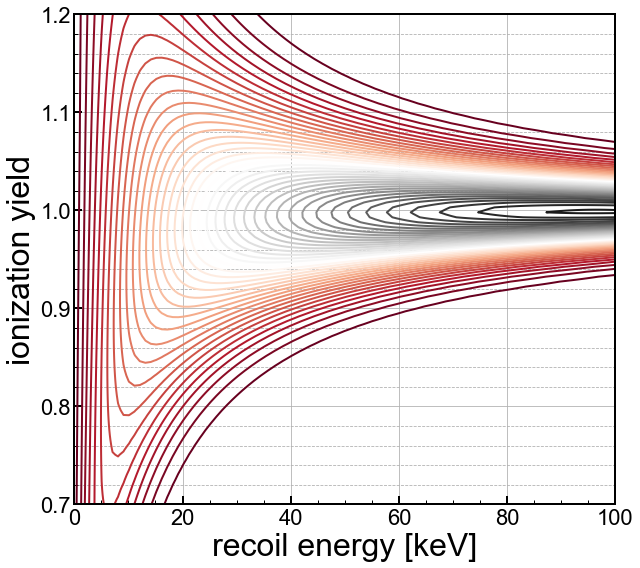

In [7]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes



#plot quick
#fig = plt.figure()
#ax1 = fig.add_subplot(111)
#ax1.plot(x, ingrndv_alt(x),label='E$_r$ function')
#ax1.contour(X, Y, Z, colors='black',label='E$_r$/N')
ax1.contour(X, Y, Z, 50,cmap='RdGy');


ax1.set_xscale('linear')
ax1.set_yscale('linear')
ax1.set_xlim(0, 100) 
ax1.set_ylim(0.7,1.2)
ax1.set_xlabel('recoil energy [keV]',**axis_font)
ax1.set_ylabel('ionization yield',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
#ax1.legend(loc=2,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('figures/figure.png')
plt.show()